### Загрузка данных

In [ ]:
pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [ ]:
import pandas as pd

# Загрузка данных
movies = pd.read_csv('/root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7/movies_metadata.csv', low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)

movies.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,To

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Предобработка

In [ ]:
# Обработка жанров
import json

def extract_first_genre_manual(genre_str):
    try:
        genres = json.loads(genre_str.replace("'", '"'))
        if genres and isinstance(genres, list):
            return genres[0]['name']
    except (ValueError, json.JSONDecodeError):
        return None
    return None

movies['main_genre'] = movies['genres'].apply(extract_first_genre_manual)

movies[['genres', 'main_genre']].head()

,genres,main_genre
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Animation
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Romance
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy
4,"[{'id': 35, 'name': 'Comedy'}]",Comedy


In [ ]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'main_genre'],
      dtype='object')

### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

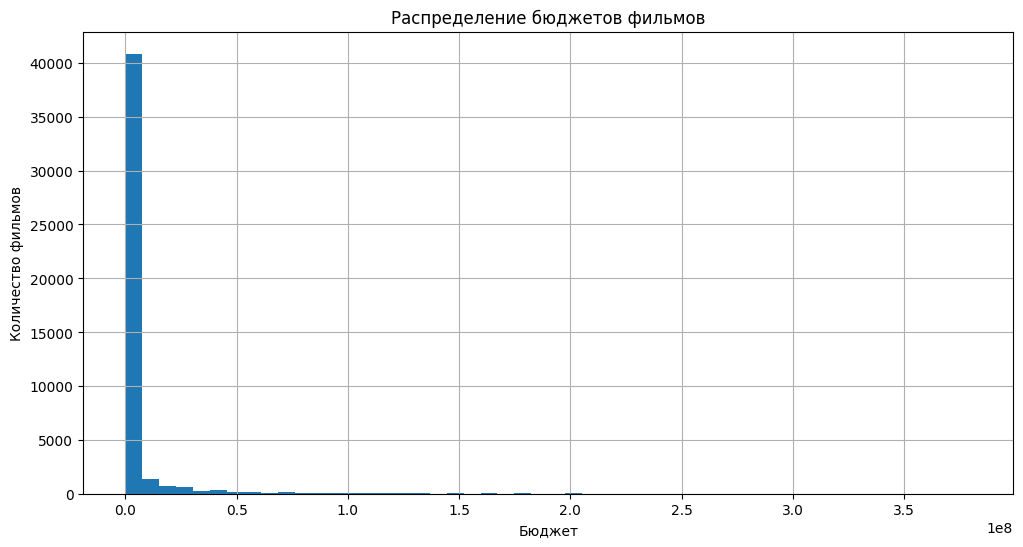

In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

# Распределение бюджетов фильмов
plt.figure(figsize=(12, 6))
movies['budget'].dropna().hist(bins=50)
plt.title('Распределение бюджетов фильмов')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.show()

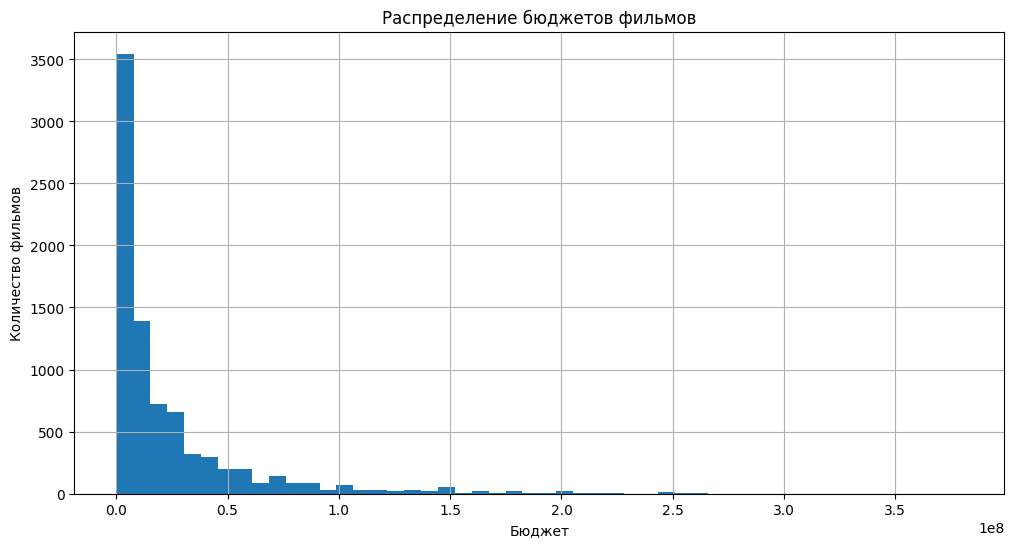

In [ ]:
movies_wozeros =  movies[movies['budget']>2*10**5]

# Распределение бюджетов фильмов без малых бюджетов
plt.figure(figsize=(12, 6))
movies_wozeros['budget'].dropna().hist(bins=50)
plt.title('Распределение бюджетов фильмов')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.show()

In [ ]:
movies_wozeros.budget.min()

201164.0

In [ ]:
movies[movies['budget']==0]['budget'].count()/ movies['budget'].count()

0.8044563711149726

Выводы?

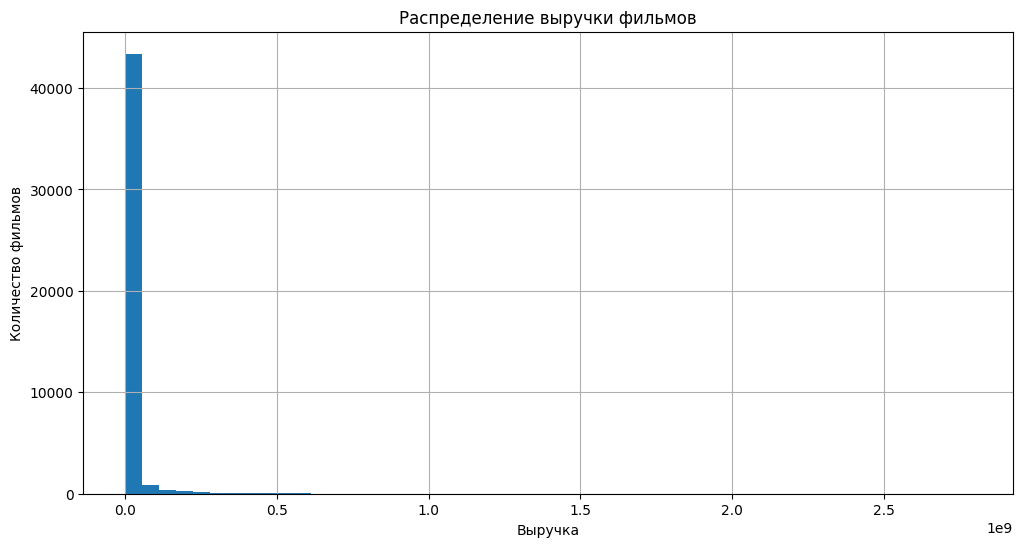

In [ ]:
# Распределение выручки фильмов
plt.figure(figsize=(12, 6))
movies['revenue'].dropna().hist(bins=50)
plt.title('Распределение выручки фильмов')
plt.xlabel('Выручка')
plt.ylabel('Количество фильмов')
plt.show()

In [ ]:
movies_wozeros =  movies_wozeros[movies_wozeros['revenue']>2*10**5]

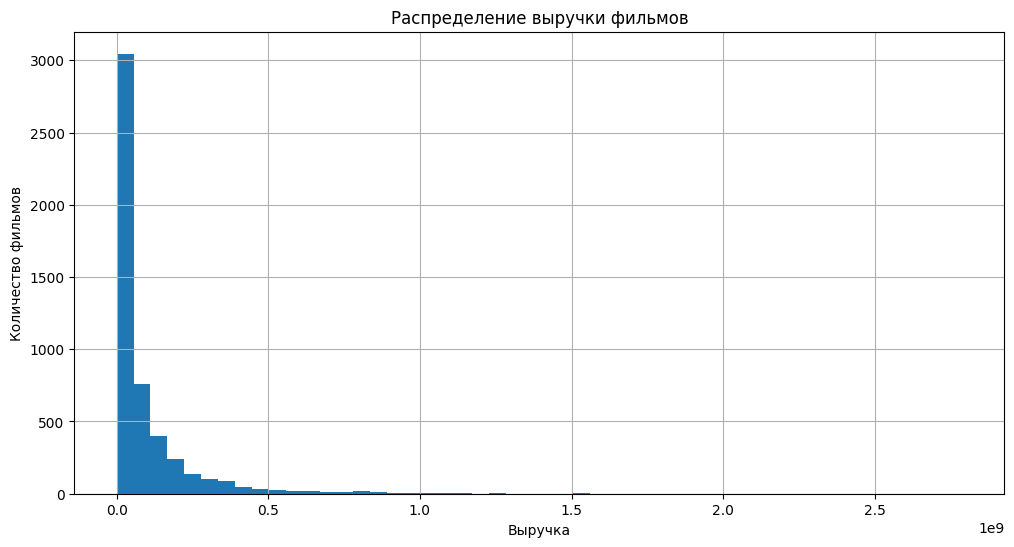

In [ ]:
# Распределение выручки фильмов без малых бюджетов и выручек
plt.figure(figsize=(12, 6))
movies_wozeros['revenue'].dropna().hist(bins=50)
plt.title('Распределение выручки фильмов')
plt.xlabel('Выручка')
plt.ylabel('Количество фильмов')
plt.show()

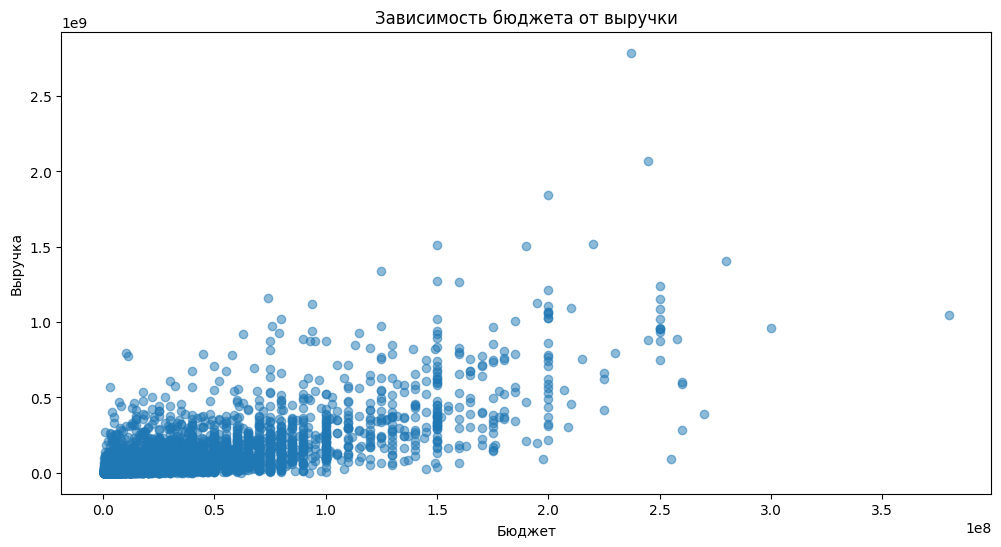

In [ ]:
# Зависимость бюджета от выручки
plt.figure(figsize=(12, 6))
plt.scatter(movies_wozeros['budget'], movies_wozeros['revenue'], alpha=0.5)
plt.title('Зависимость бюджета от выручки')
plt.xlabel('Бюджет')
plt.ylabel('Выручка')
plt.show()

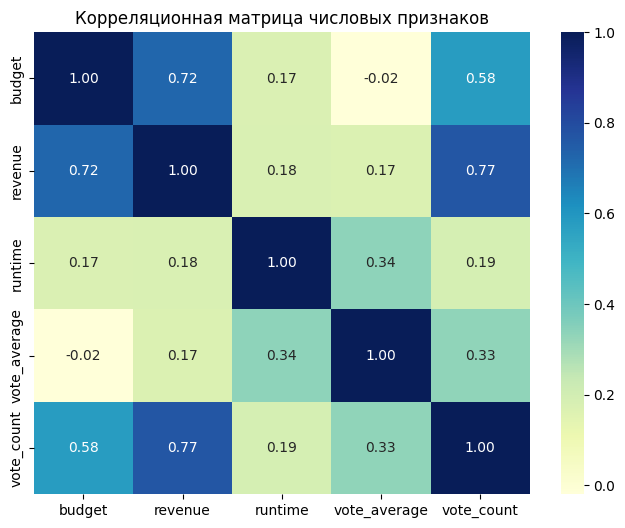

In [ ]:
# отрисуем корреляционную матрицу признаков

# Выберем только числовые признаки
numeric_cols = movies_wozeros.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = movies_wozeros[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()

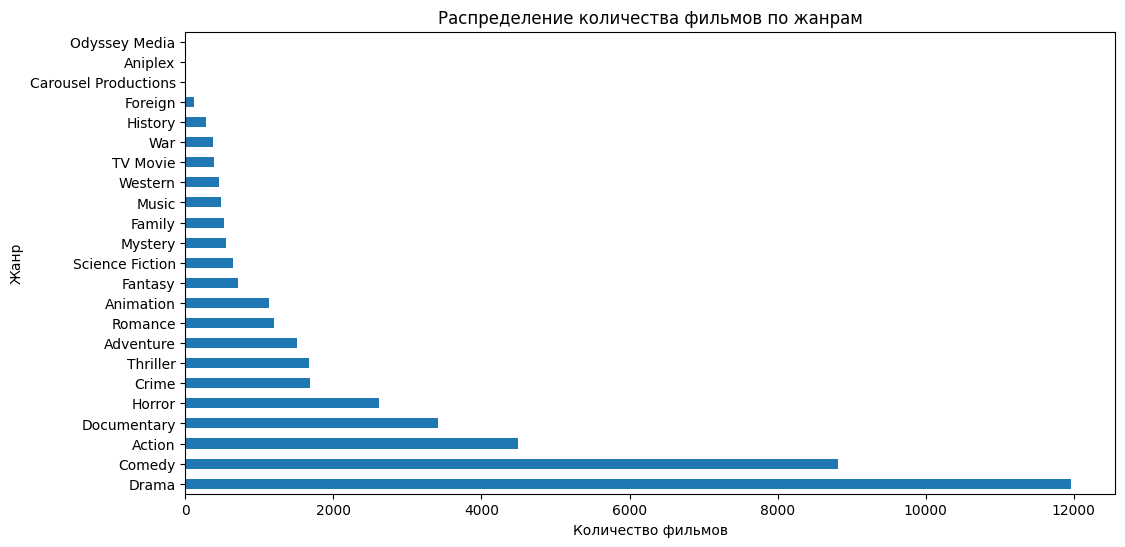

In [ ]:
# Распределение количества фильмов по жанрам
plt.figure(figsize=(12, 6))
movies['main_genre'].value_counts().plot(kind='barh', title='Распределение количества фильмов по жанрам')
plt.xlabel('Количество фильмов')
plt.ylabel('Жанр')
plt.show()

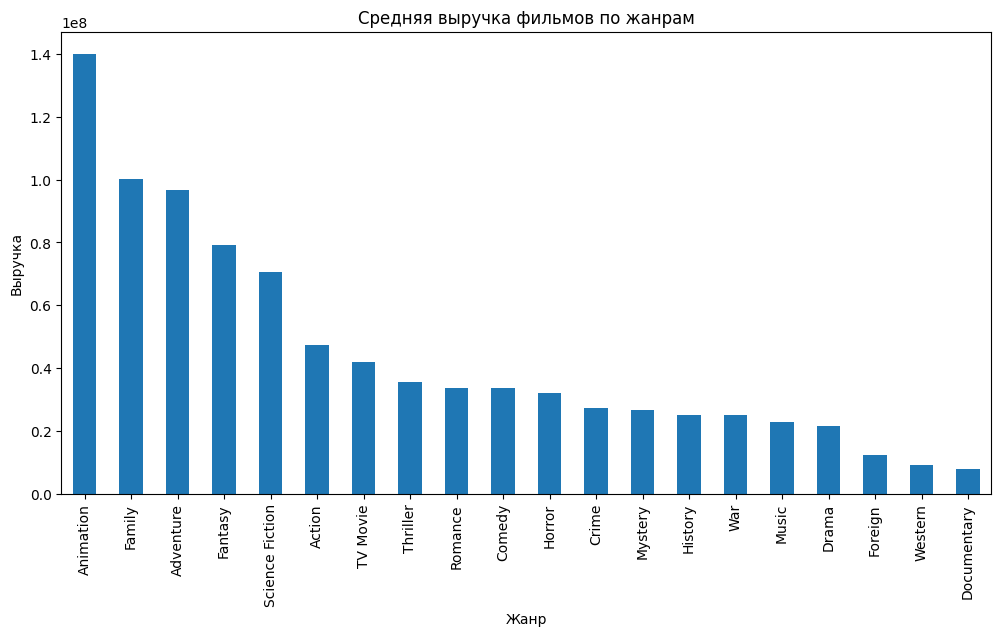

In [ ]:
top_genres_rating = movies_wozeros.groupby('main_genre')['revenue'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_genres_rating.plot(kind='bar', title='Средняя выручка фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.show()

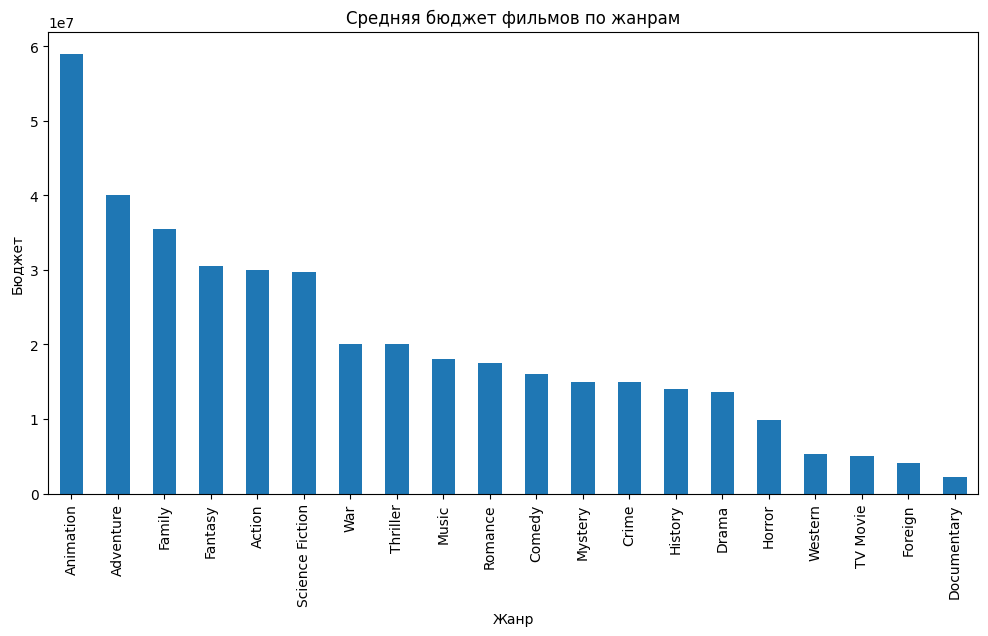

In [ ]:
top_genres_rating = movies_wozeros.groupby('main_genre')['budget'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_genres_rating.plot(kind='bar', title='Средняя бюджет фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Бюджет')
plt.show()

### Введение новой метрики (?)

In [ ]:
# Вычисляем метрику "выручка / бюджет" по жанрам
movies_wozeros['revenue_to_budget'] = movies_wozeros['revenue'] / movies_wozeros['budget']

# Группируем данные по жанрам и считаем среднее значение метрики
genre_ratio = movies_wozeros.groupby('main_genre')['revenue_to_budget'].mean().sort_values(ascending=False)


In [ ]:
genre_ratio

,revenue_to_budget
main_genre,
Horror,8.844968
TV Movie,8.400000
Animation,7.283404
Family,6.316659
Documentary,5.813719
History,5.129017
Western,5.074589
Adventure,4.836495
Fantasy,4.589319


<ipython-input-23-0850606bfe83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette='tab10')


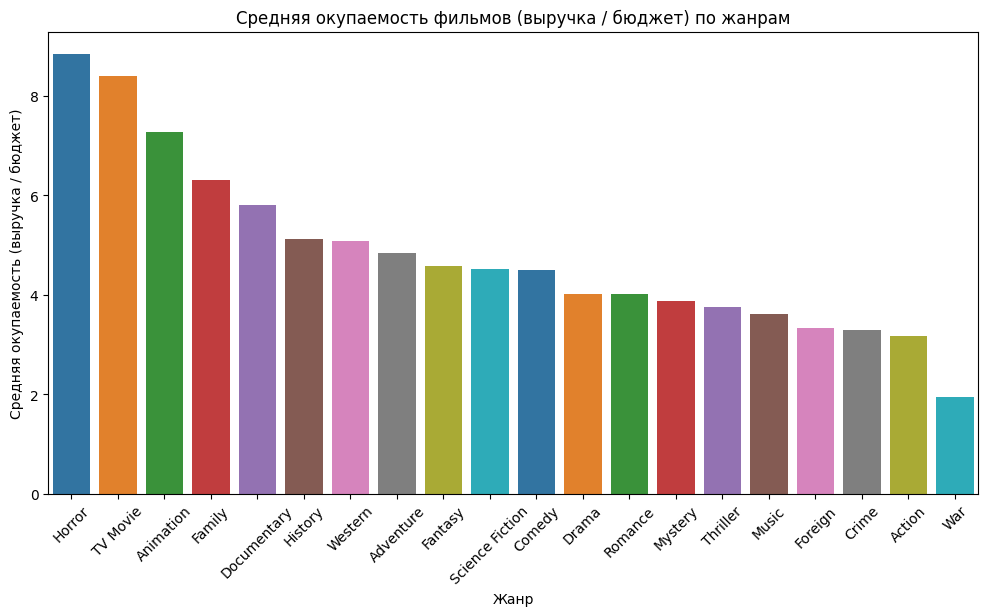

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette='tab10')

plt.title('Средняя окупаемость фильмов (выручка / бюджет) по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя окупаемость (выручка / бюджет)')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Группируем данные по жанрам и считаем среднее значение метрики
genre_ratio = movies_wozeros.groupby('main_genre')['revenue_to_budget'].median().sort_values(ascending=False)

<ipython-input-25-094858f144f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette='tab10')


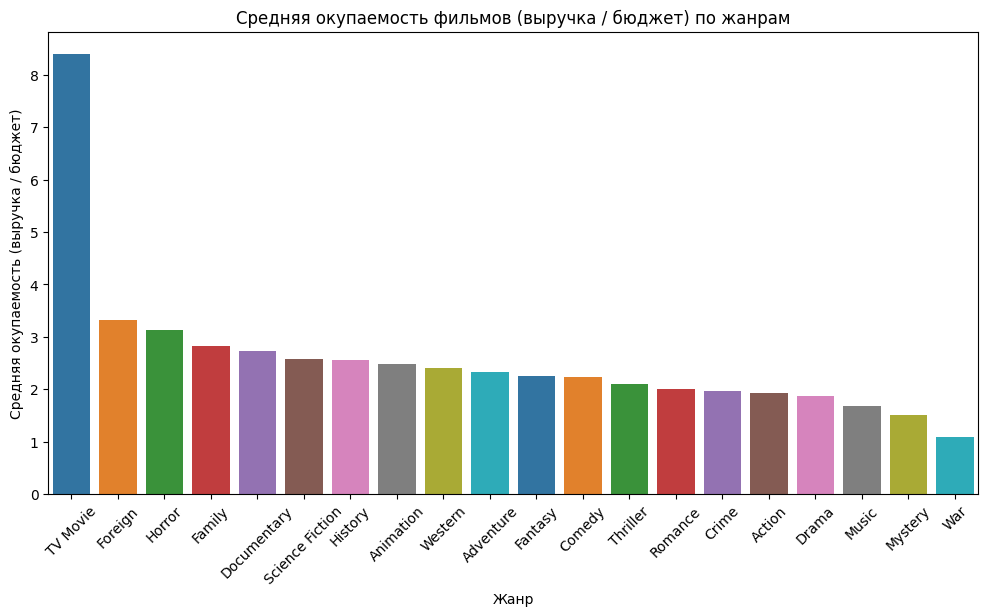

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette='tab10')
plt.title('Медианная окупаемость фильмов (выручка / бюджет) по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианная окупаемость (выручка / бюджет)')
plt.xticks(rotation=45)

plt.show()

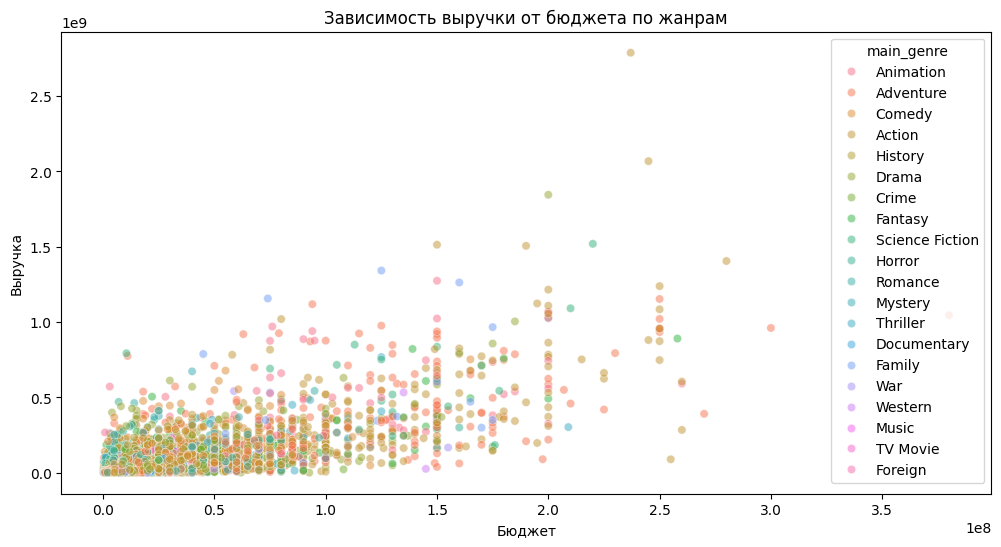

In [ ]:
# библиотека sns
# выручка от бюджета

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=movies_wozeros,
    x='budget',
    y='revenue',
    hue='main_genre',
    alpha=0.5,
)

plt.title('Зависимость выручки от бюджета по жанрам')
plt.xlabel('Бюджет')
plt.ylabel('Выручка')

plt.show()

<ipython-input-27-6469ab1e92a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab10')


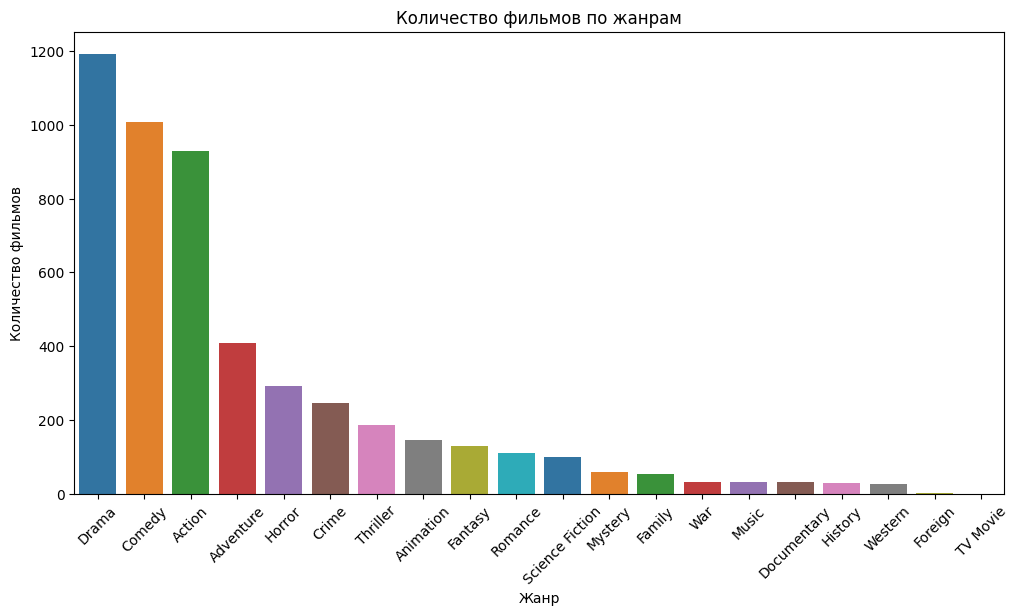

In [ ]:
genre_counts = movies_wozeros['main_genre'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab10')

plt.title('Количество фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)

plt.show()

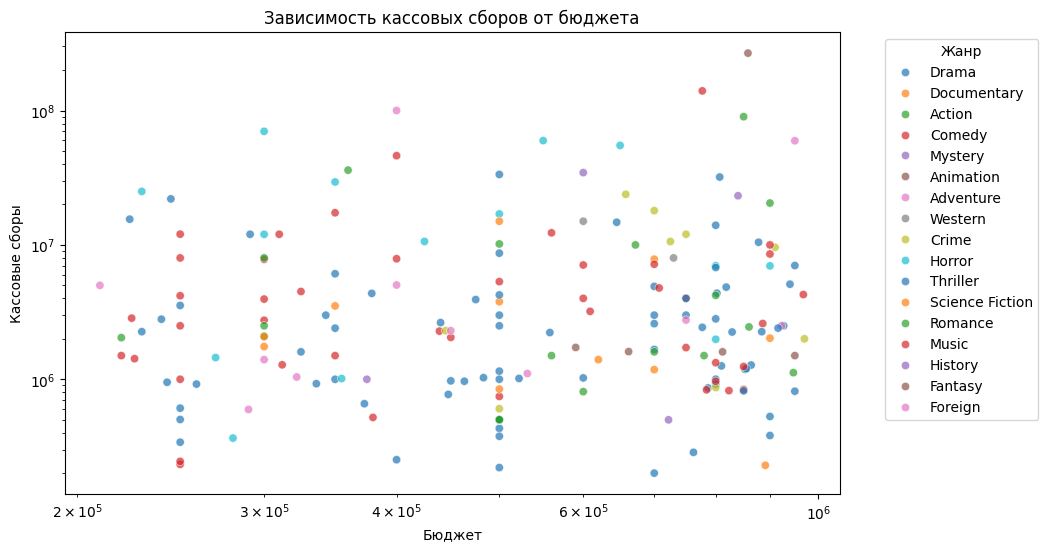

In [ ]:
# ограничим бюджет от 200к до 1кк долларов

filtered_movies_bud = movies_wozeros[movies_wozeros['budget'] < 10**6]

# Создание scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_movies_bud,
    x='budget',
    y='revenue',
    hue='main_genre',
    palette='tab10',
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')  # Используем логарифмическую шкалу для лучшей визуализации
plt.title('Зависимость кассовых сборов от бюджета')
plt.xlabel('Бюджет')
plt.ylabel('Кассовые сборы')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-29-6fa99f2b571a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


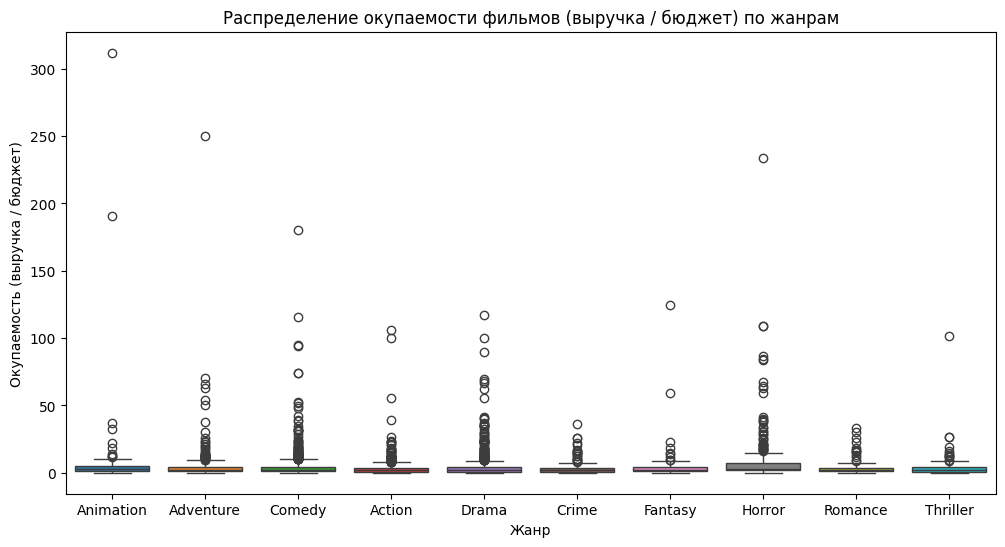

In [ ]:
# Ограничиваем жанры, у которых больше 100 фильмов
genre_counts = movies_wozeros['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts > 100].index
filtered_movies = movies_wozeros[movies_wozeros['main_genre'].isin(valid_genres)]

# Построение boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_movies,
    x='main_genre',
    y='revenue_to_budget',
    palette='tab10'
)

plt.title('Распределение окупаемости фильмов (выручка / бюджет) по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Окупаемость (выручка / бюджет)')

plt.show()

<ipython-input-30-7ff413331330>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


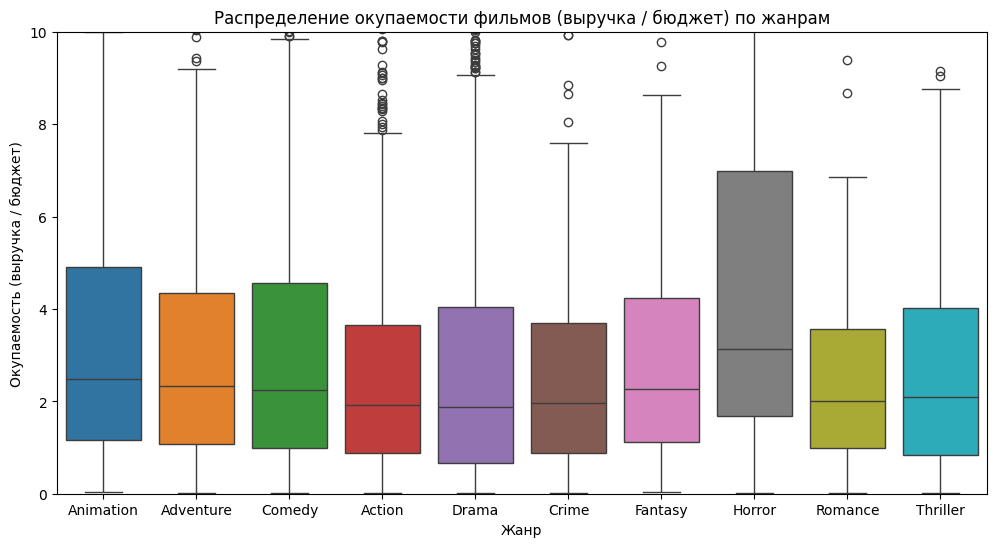

In [ ]:
# Построение boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_movies,
    x='main_genre',
    y='revenue_to_budget',
    palette='tab10'
)

plt.title('Распределение окупаемости фильмов (выручка / бюджет) по жанрам')
plt.xlabel('Жанр')
plt.ylim(0, 10)
plt.ylabel('Окупаемость (выручка / бюджет)')

plt.show()